In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# run this if you are in colab 
"""!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip"""

'!wget --no-check-certificate     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip     -O /tmp/horse-or-human.zip'

In [3]:
# run this if you are in colab 
"""!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip"""

'!wget --no-check-certificate     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip     -O /tmp/validation-horse-or-human.zip'

In [4]:
#run this code to extract images from zip files
import os
import zipfile

local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('validation-horse-or-human')
zip_ref.close()

In [5]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('validation-horse-or-human/humans')

In [6]:
#checking out the file names
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

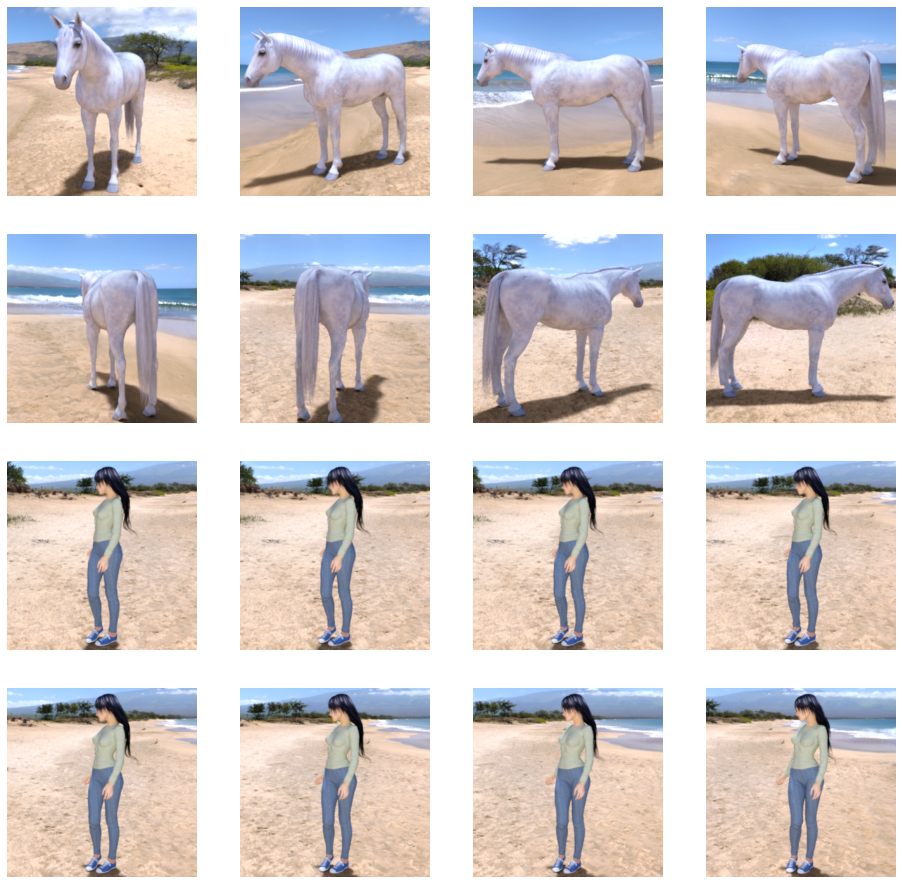

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a Deep neural network
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescaling all the images having pixel values b/w (0,1)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  # here we are resixing all images to 300x300
        batch_size=128,
        class_mode='binary') # we are using binary since we are classifing image into only two types

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  
        target_size=(300, 300),  
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 85s 12s/step - loss: 0.8324 - accuracy: 0.5339 - val_loss: 0.6734 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 55s 7s/step - loss: 1.0095 - accuracy: 0.6218 - val_loss: 0.6017 - val_accuracy: 0.5625
Epoch 3/15
8/8 [==============================] - 58s 7s/step - loss: 0.5650 - accuracy: 0.7607 - val_loss: 0.9187 - val_accuracy: 0.5820
Epoch 4/15
8/8 [==============================] - 58s 7s/step - loss: 0.3964 - accuracy: 0.8301 - val_loss: 0.7149 - val_accuracy: 0.8672
Epoch 5/15
8/8 [==============================] - 54s 7s/step - loss: 0.3999 - accuracy: 0.8387 - val_loss: 0.4252 - val_accuracy: 0.8633
Epoch 6/15
8/8 [==============================] - 48s 6s/step - loss: 0.2319 - accuracy: 0.9221 - val_loss: 0.8225 - val_accuracy: 0.7930
Epoch 7/15
8/8 [==============================] - 50s 6s/step - loss: 0.2053 - accuracy: 0.9221 - val_loss: 0.3284 - val_accuracy: 0.9023
Epoch 8/15
8/8 [=================

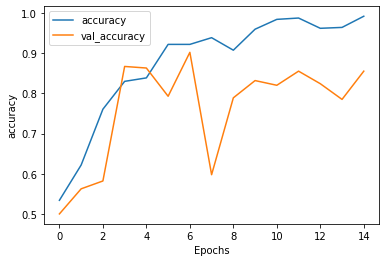

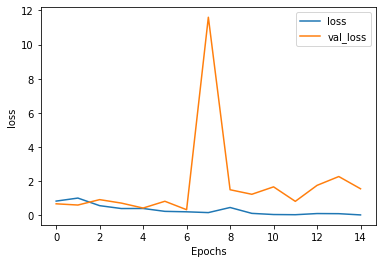

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
# this is if you are running in google colab
"""import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")"""

'import numpy as np\nfrom google.colab import files\nfrom keras.preprocessing import image\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n \n  # predicting images\n  path = \'/content/\' + fn\n  img = image.load_img(path, target_size=(300, 300))\n  x = image.img_to_array(img)\n  x = np.expand_dims(x, axis=0)\n\n  images = np.vstack([x])\n  classes = model.predict(images, batch_size=10)\n  print(classes[0])\n  if classes[0]>0.5:\n    print(fn + " is a human")\n  else:\n    print(fn + " is a horse")'

<ipython-input-17-6f8d5bce6158>:28: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


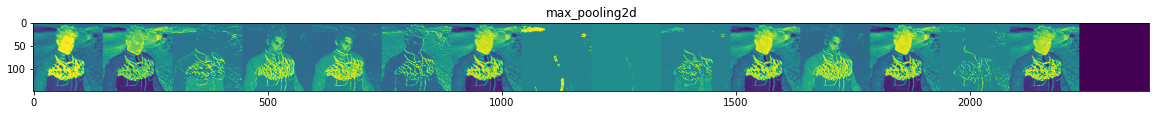

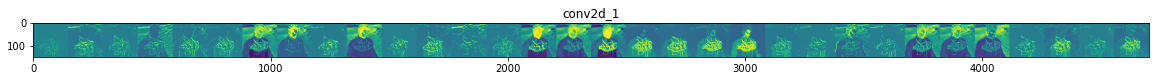

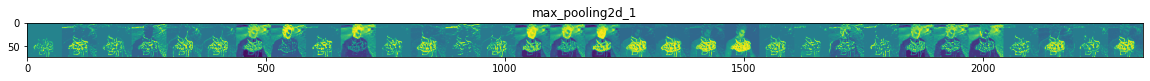

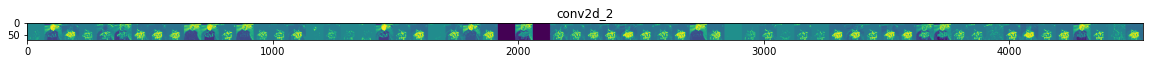

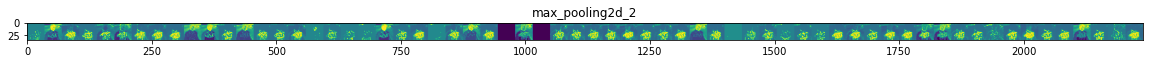

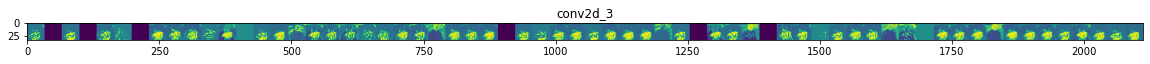

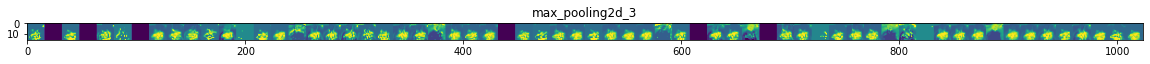

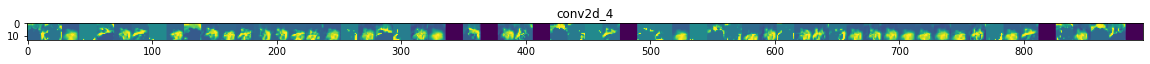

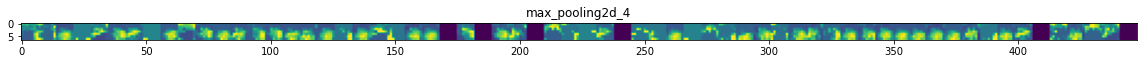

In [17]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img


successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  
x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]  
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [21]:
#!pip install gradio 
# uncomment and run the avove command is gradio isn't installed in your system
import gradio as gr
from keras.preprocessing import image as imageconv

def sender(img):
  x = imageconv.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0]>0.5:
    return "HUMAN"
  else:
    return "HORSE"

image = gr.inputs.Image(shape=(300, 300))
label = gr.outputs.Label()

showface = gr.Interface(fn=sender, inputs=image, outputs=label, capture_session=True)
showface.launch()

Running locally at: http://127.0.0.1:7863/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7863/', None)